<h1>Diabetes Dataset EDA & Prediction</h1>

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv 


In [125]:
Data=pd.read_csv("diabetes.csv")
df_diabetes=pd.DataFrame(Data)

In [126]:
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [127]:
#Any null values
null_values=df_diabetes.isnull().sum()
null_values


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [128]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [129]:
df_diabetes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [130]:
df_diabetes['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [131]:
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [132]:
df_diabetes.Age.value_counts()

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

In [133]:
df_diabetes['BloodPressure'].value_counts()
#here zero is invalid value of blood pressure so we will drop it
df_diabetes = df_diabetes[df_diabetes['BloodPressure'] != 0]


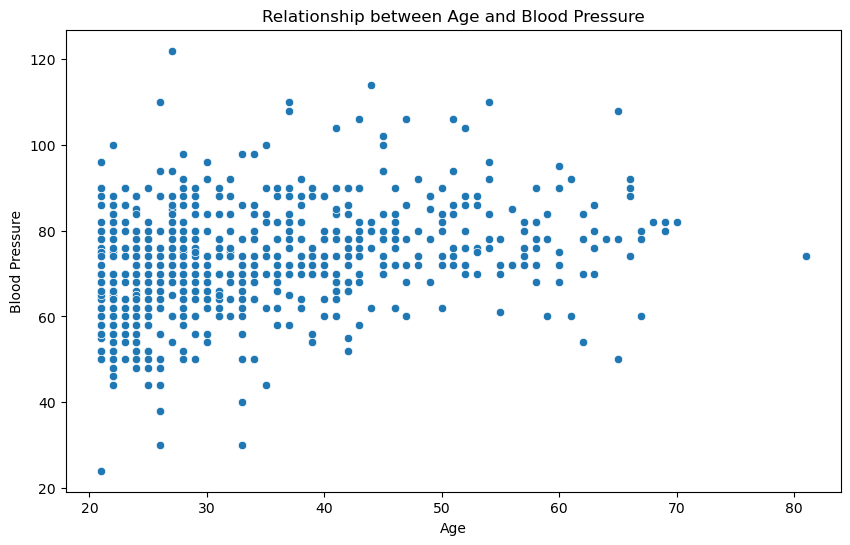

In [134]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BloodPressure', data=df_diabetes)
plt.title('Relationship between Age and Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()

In [135]:
df_diabetes=df_diabetes[df_diabetes['SkinThickness']!=0]

In [136]:
#Relationship between Pregnancies and BMI
df_diabetes.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

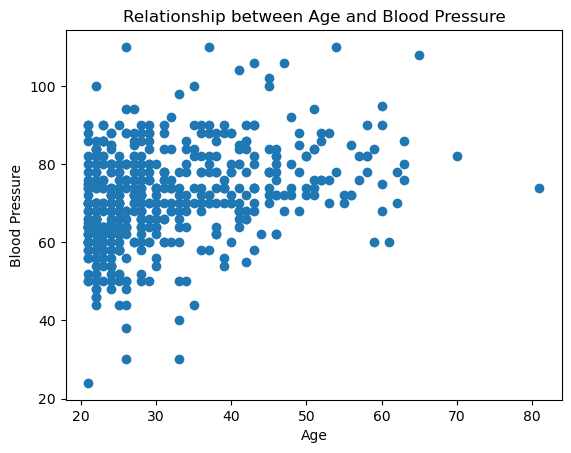

In [137]:
import matplotlib.pyplot as plt


# Create a scatter plot
plt.scatter(df_diabetes['Age'], df_diabetes['BloodPressure'])
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Relationship between Age and Blood Pressure')
plt.show()

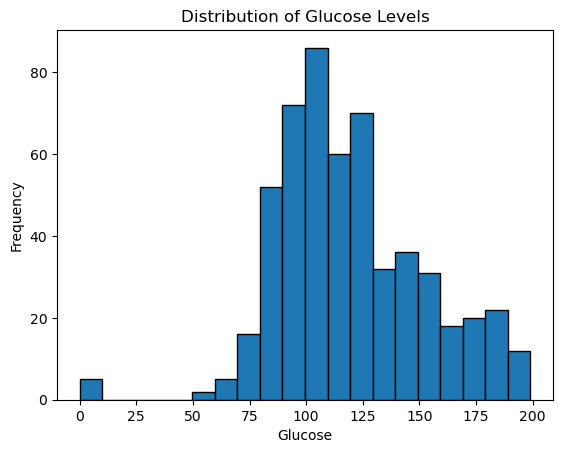

In [138]:
import pandas as pd


# Create a histogram
plt.hist(df_diabetes['Glucose'], bins=20, edgecolor='black')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose Levels')
plt.show()

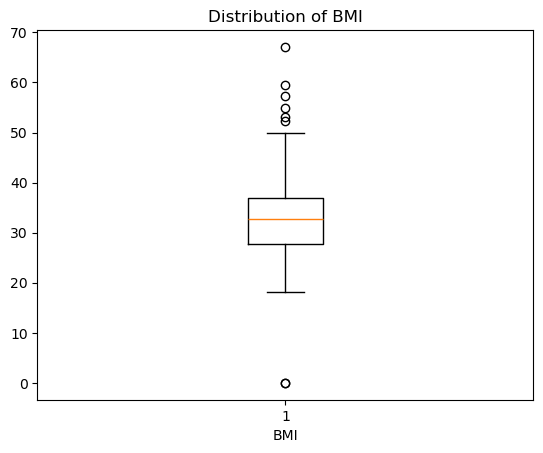

In [139]:


# Create a box plot
plt.boxplot(df_diabetes['BMI'])
plt.xlabel('BMI')
plt.title('Distribution of BMI')
plt.show()

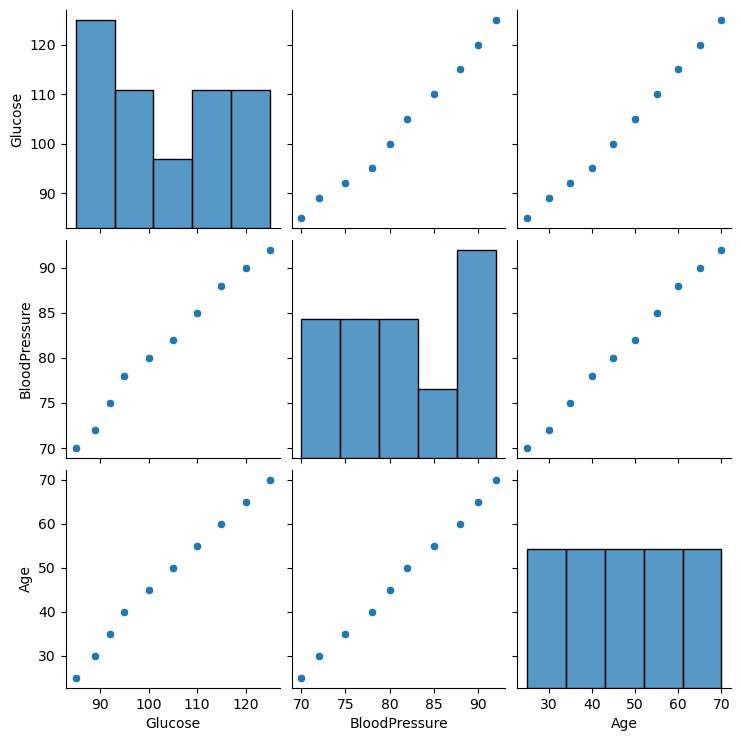

In [140]:
import seaborn as sns

# Sample data
data = {
    'Glucose': [85, 89, 92, 95, 100, 105, 110, 115, 120, 125],
    'BloodPressure': [70, 72, 75, 78, 80, 82, 85, 88, 90, 92],
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
}
df = pd.DataFrame(data)

# Create a pair plot
sns.pairplot(df)
plt.show()

<Axes: >

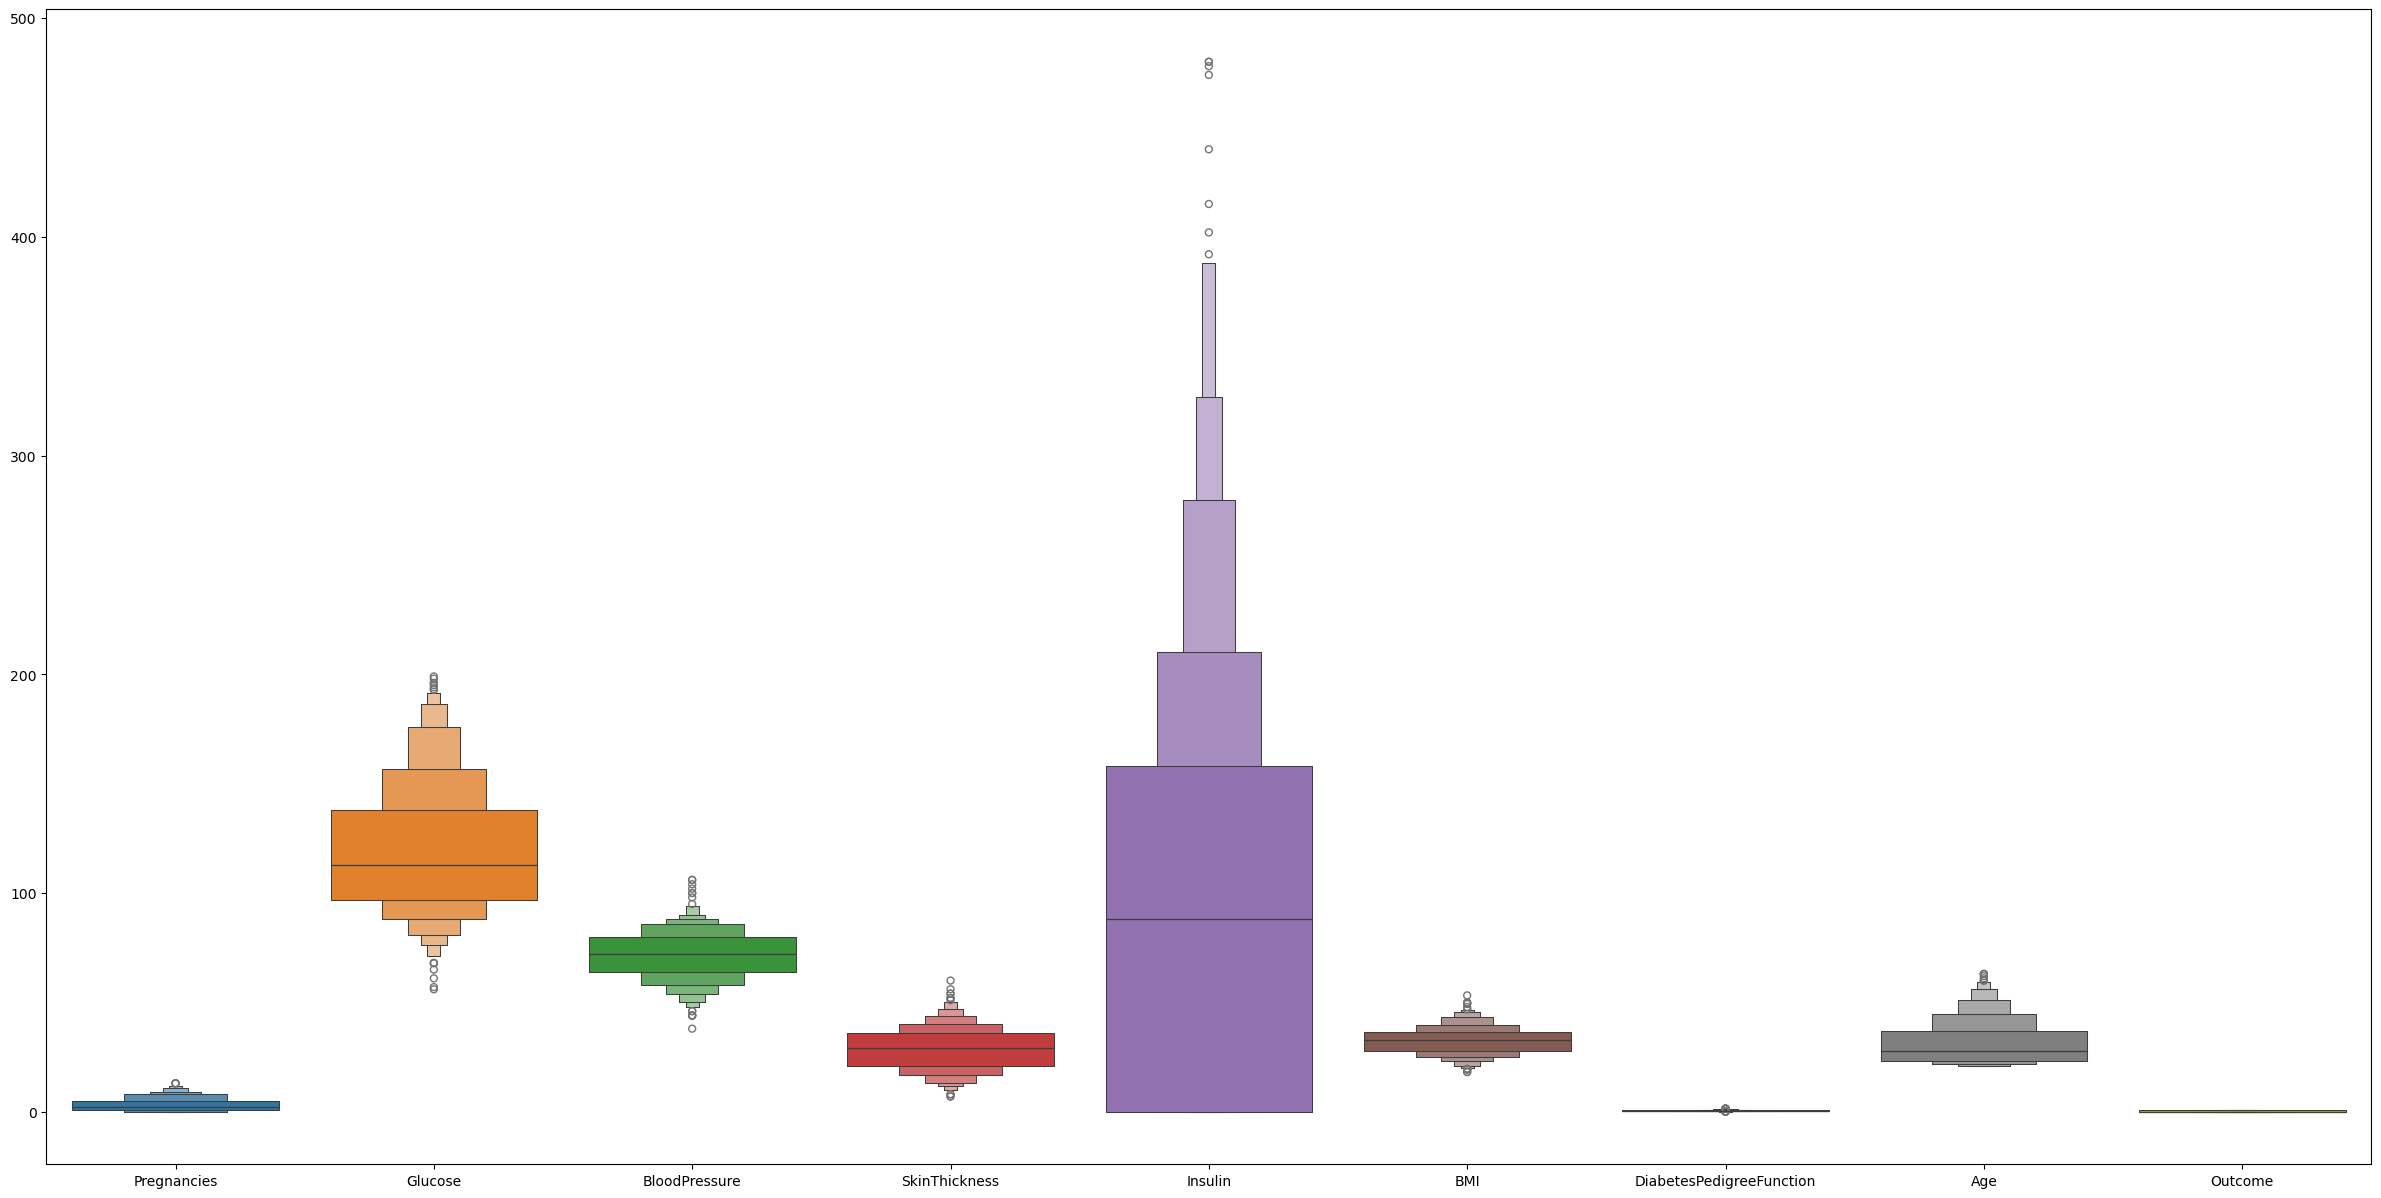

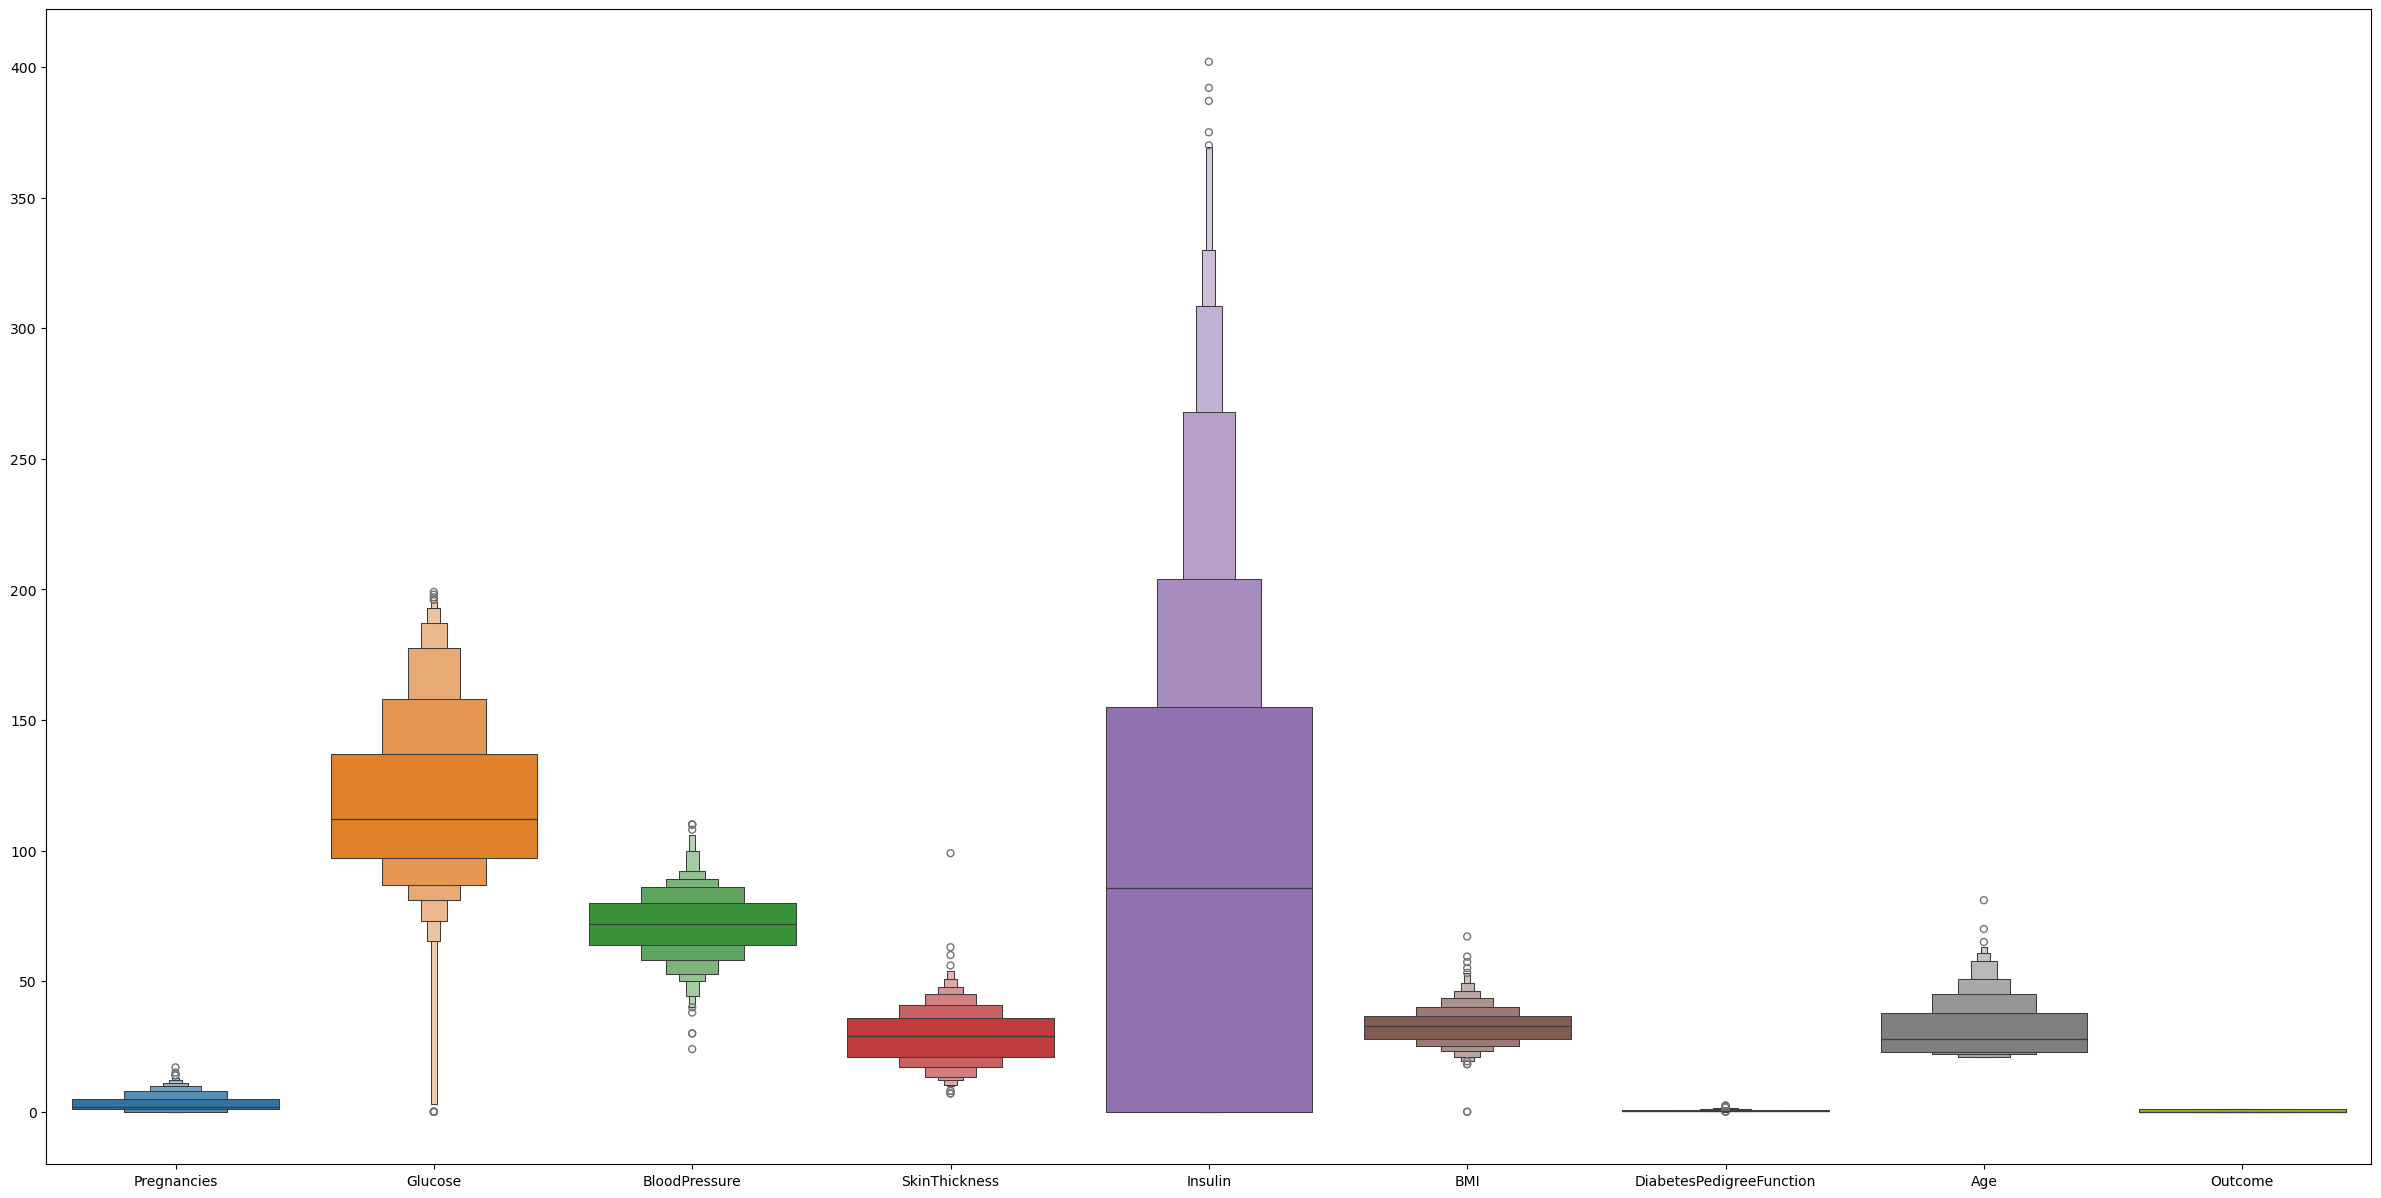

In [141]:
from scipy import stats
new = df_diabetes[(np.abs(stats.zscore(df_diabetes)) < 3).all(axis=1)]
plt.figure(figsize=(30,15))
sns.boxenplot(new)


Q1=df_diabetes['Insulin'].quantile(0.25)
Q3=df_diabetes['Insulin'].quantile(0.75)

IQR=Q3-Q1

upper_limit= Q3 + 1.5*IQR
lower_limit=Q1 - 1.5*IQR

checker=df_diabetes[(df_diabetes['Insulin']>lower_limit) & (df_diabetes['Insulin']<upper_limit)]
plt.figure(figsize=(30,15))
sns.boxenplot(checker)

In [142]:
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [143]:
# Sample data
data = {'Age': [25, 30, np.nan, 40, 45, np.nan, 55, 60]}
df = pd.DataFrame(data)

# Fill missing values with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)
print(df)
df.drop_duplicates(inplace=True)
df

    Age
0  25.0
1  30.0
2  42.5
3  40.0
4  45.0
5  42.5
6  55.0
7  60.0


/tmp/ipykernel_145099/3471920558.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


,Age
0,25.0
1,30.0
2,42.5
3,40.0
4,45.0
6,55.0
7,60.0


In [144]:
#Normalization

df_min_max_scaled=(df_diabetes-df_diabetes.min())/(df_diabetes.max()-df_diabetes.min())
df_min_max_scaled


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.558140,0.304348,0.000000,0.500745,0.232120,0.483333,1.0
1,0.058824,0.427136,0.488372,0.239130,0.000000,0.396423,0.113919,0.166667,0.0
3,0.058824,0.447236,0.488372,0.173913,0.111111,0.418778,0.035118,0.000000,0.0
4,0.000000,0.688442,0.186047,0.304348,0.198582,0.642325,0.943469,0.200000,1.0
6,0.176471,0.391960,0.302326,0.271739,0.104019,0.461997,0.069807,0.083333,1.0
...,...,...,...,...,...,...,...,...,...
761,0.529412,0.854271,0.581395,0.260870,0.000000,0.655738,0.136188,0.366667,1.0
763,0.588235,0.507538,0.604651,0.445652,0.212766,0.490313,0.036831,0.700000,0.0
764,0.117647,0.613065,0.534884,0.217391,0.000000,0.548435,0.109208,0.100000,0.0
765,0.294118,0.608040,0.558140,0.173913,0.132388,0.390462,0.068522,0.150000,0.0


In [145]:
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [146]:
df_diabetes['Outcome']

0      1
1      0
3      0
4      1
6      1
      ..
761    1
763    0
764    0
765    0
767    0
Name: Outcome, Length: 539, dtype: int64

In [ ]:
df_diabetes
print(df_diabetes['Glucose'].skew())
print(df_diabetes['Pregnancies'].skew())
df_diabetes['log_pregnanacies']=np.log(df_diabetes['Pregnancies'])



0.14458214260086322
1.1477379145533584


/home/raqeeb/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,log_pregnanacies
0,6,148,72,35,0,33.6,0.627,50,NaN,1.791759
1,1,85,66,29,0,26.6,0.351,31,NaN,0.000000
3,1,89,66,23,94,28.1,0.167,21,NaN,0.000000
4,0,137,40,35,168,43.1,2.288,33,NaN,-inf
6,3,78,50,32,88,31.0,0.248,26,NaN,1.098612
...,...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,NaN,2.197225
763,10,101,76,48,180,32.9,0.171,63,NaN,2.302585
764,2,122,70,27,0,36.8,0.340,27,NaN,0.693147
765,5,121,72,23,112,26.2,0.245,30,NaN,1.609438


In [153]:
df = pd.DataFrame({'Color': ['Red', 'Green', 'Blue', 'Green', 'Red']})
# Create a mapping of categories to numbers
label_mapping = {'Red': 0, 'Green': 1, 'Blue': 2}
# Apply the mapping to the column
df['Color_encoded'] = df['Color'].map(label_mapping)
print(df)

   Color  Color_encoded
0    Red              0
1  Green              1
2   Blue              2
3  Green              1
4    Red              0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Split the dataset into training and testing sets
# Justification for 80-20 split: This is a common practice to ensure that the model has enough data to learn from while also having sufficient data to test its performance.
X = df_diabetes.drop(columns=['Outcome'])
y = df_diabetes['Outcome'].astype('int')  # Ensure the target variable is of integer type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Provide a classification mechanism and validate it using different validation metrics
# Using Logistic Regression as the classification mechanism
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test_scaled)

# Validation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))